In [1]:
from scipy.io import arff
import pandas
import numpy as np
import seaborn as sns
import math
import operator
import scipy

In [2]:
# reading arff files 
import arff
dataset = arff.load(open('trainProdSelection.arff'))
train_data=pandas.DataFrame(dataset['data'])
train_attributes=pandas.DataFrame(dataset['attributes'])
train_attributes[0]
train_data.columns=train_attributes[0]
train_data

#test data
test_dataset=arff.load(open('testProdSelection.arff'))
test_data=pandas.DataFrame(test_dataset['data'])
test_attributes=pandas.DataFrame(test_dataset['attributes'])
test_attributes[0]
test_data.columns=test_attributes[0]

In [3]:
train_data.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,6.0,40.0,13.62,3.2804,C1
1,student,spend>saving,11.0,21.0,15.32,2.0232,C1
2,student,spend>saving,7.0,64.0,16.55,3.1202,C1
3,student,spend>saving,3.0,47.0,15.71,3.4022,C1
4,student,spend>saving,15.0,10.0,16.96,2.2825,C1


In [4]:
test_data.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend<saving,12.0,19.0,14.7900,3.7697,C1
1,student,spend>>saving,29.0,10.0,16.1900,2.4839,C1
2,student,spend<<saving,28.0,60.0,15.4600,1.1885,C1
3,engineer,spend>saving,15.0,41.0,21.2600,1.4379,C1
4,librarian,spend<saving,2.0,9.0,19.7207,0.6913,C1


In [5]:
train_data.shape

(186, 7)

In [6]:
test_data.shape

(21, 7)

### Normalization of train data

In [7]:
# col=['Vacation','eCredit','salary','property']
min_vacation = train_data.Vacation.min()
max_vacation = train_data.Vacation.max()
train_data.Vacation = train_data.Vacation.apply(lambda x:(x-min_vacation)/(max_vacation-min_vacation))
min_ecredit = train_data.eCredit.min()
max_ecredit = train_data.eCredit.max()
train_data.eCredit = train_data.eCredit.apply(lambda x:(x-min_ecredit)/(max_ecredit-min_ecredit))
min_Salary = train_data.salary.min()
max_Salary = train_data.salary.max()
train_data.salary = train_data.salary.apply(lambda x:(x-min_Salary)/(max_Salary-min_Salary))
min_property = train_data.property.min()
maximum_property = train_data.property.max()
train_data.property = train_data.property.apply(lambda x:(x-min_property)/(maximum_property-min_property))


In [8]:
train_data.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,0.079365,0.107558,0.219960,0.183167,C1
1,student,spend>saving,0.158730,0.052326,0.293102,0.112797,C1
2,student,spend>saving,0.095238,0.177326,0.346023,0.174200,C1
3,student,spend>saving,0.031746,0.127907,0.309882,0.189984,C1
4,student,spend>saving,0.222222,0.020349,0.363663,0.127311,C1


### Normalization of test data

In [9]:
min_vacation = test_data.Vacation.min()
max_vacation = test_data.Vacation.max()
test_data.Vacation = test_data.Vacation.apply(lambda x:(x-min_vacation)/(max_vacation-min_vacation))
min_ecredit = test_data.eCredit.min()
max_ecredit = test_data.eCredit.max()
test_data.eCredit = test_data.eCredit.apply(lambda x:(x-min_ecredit)/(max_ecredit-min_ecredit))
min_Salary = test_data.salary.min()
max_Salary = test_data.salary.max()
test_data.salary = test_data.salary.apply(lambda x:(x-min_Salary)/(max_Salary-min_Salary))
min_property = test_data.property.min()
maximum_property = test_data.property.max()
test_data.property = test_data.property.apply(lambda x:(x-min_property)/(maximum_property-min_property))


In [10]:
test_data.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend<saving,0.20,0.058824,0.104637,0.398926,C1
1,student,spend>>saving,0.54,0.021008,0.175059,0.243041,C1
2,student,spend<<saving,0.52,0.231092,0.138339,0.085992,C1
3,engineer,spend>saving,0.26,0.151261,0.430086,0.116229,C1
4,librarian,spend<saving,0.00,0.016807,0.352657,0.025714,C1


In [11]:
train_data.isnull().sum().sort_values(ascending=False)

0
label        0
property     0
salary       0
eCredit      0
Vacation     0
LifeStyle    0
Type         0
dtype: int64

In [12]:
test_data.isnull().sum().sort_values(ascending=False)

0
label        0
property     0
salary       0
eCredit      0
Vacation     0
LifeStyle    0
Type         0
dtype: int64

### One hot enoding for Train_data

In [13]:

train_data=pandas.get_dummies(train_data,columns=['Type','LifeStyle'],drop_first=True)


In [14]:
train_data

,Vacation,eCredit,salary,property,label,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,0.079365,0.107558,0.219960,0.183167,C1,0,0,0,1,0,0,1
1,0.158730,0.052326,0.293102,0.112797,C1,0,0,0,1,0,0,1
2,0.095238,0.177326,0.346023,0.174200,C1,0,0,0,1,0,0,1
3,0.031746,0.127907,0.309882,0.189984,C1,0,0,0,1,0,0,1
4,0.222222,0.020349,0.363663,0.127311,C1,0,0,0,1,0,0,1
5,0.079365,0.223837,0.300847,0.208545,C1,0,0,0,1,0,0,1
6,0.142857,0.133721,0.359360,0.327773,C1,0,0,0,1,1,0,0
7,0.142857,0.235465,0.264706,0.177939,C1,0,0,0,1,1,0,0
8,0.126984,0.206395,0.230286,0.132897,C1,0,0,0,1,1,0,0
9,0.333333,0.101744,0.231147,0.040939,C1,0,0,0,1,0,1,0


### One hot encoding for Test_data


In [15]:
test_data=pandas.get_dummies(test_data,columns=['Type','LifeStyle'],drop_first=True)


In [16]:
test_data

,Vacation,eCredit,salary,property,label,Type_engineer,Type_librarian,Type_professor,Type_student,LifeStyle_spend<saving,LifeStyle_spend>>saving,LifeStyle_spend>saving
0,0.20,0.058824,0.104637,0.398926,C1,0,0,0,1,1,0,0
1,0.54,0.021008,0.175059,0.243041,C1,0,0,0,1,0,1,0
2,0.52,0.231092,0.138339,0.085992,C1,0,0,0,1,0,0,0
3,0.26,0.151261,0.430086,0.116229,C1,1,0,0,0,0,0,1
4,0.00,0.016807,0.352657,0.025714,C1,0,1,0,0,1,0,0
5,0.10,0.016807,0.000000,0.120460,C1,0,1,0,0,0,0,1
6,0.06,0.021008,0.411123,0.101098,C1,0,0,1,0,0,0,1
7,0.02,0.042017,0.194228,0.000000,C1,0,0,1,0,1,0,0
8,0.14,0.277311,0.653424,0.195856,C1,0,0,0,1,1,0,0
9,0.16,0.260504,0.724349,0.407340,C1,0,0,0,1,0,0,1


In [17]:
train_label = train_data['label']
train_label

0      C1
1      C1
2      C1
3      C1
4      C1
5      C1
6      C1
7      C1
8      C1
9      C1
10     C1
11     C1
12     C1
13     C1
14     C1
15     C1
16     C1
17     C1
18     C1
19     C1
20     C1
21     C1
22     C1
23     C1
24     C1
25     C1
26     C1
27     C1
28     C1
29     C1
       ..
156    C5
157    C5
158    C5
159    C5
160    C5
161    C5
162    C5
163    C5
164    C5
165    C5
166    C5
167    C5
168    C5
169    C5
170    C5
171    C5
172    C5
173    C5
174    C5
175    C5
176    C5
177    C5
178    C5
179    C5
180    C5
181    C5
182    C5
183    C5
184    C5
185    C5
Name: label, Length: 186, dtype: object

In [18]:
test_label = test_data['label']

In [19]:
test_label

0     C1
1     C1
2     C1
3     C1
4     C1
5     C1
6     C1
7     C1
8     C1
9     C1
10    C1
11    C1
12    C1
13    C1
14    C1
15    C1
16    C1
17    C1
18    C1
19    C1
20    C1
Name: label, dtype: object

In [20]:
test_data=test_data.drop(['label'],axis=1)
train_data=train_data.drop(['label'],axis=1)

### calculating euclidean_distance and performing knn

In [21]:
import math
import pandas as pd
import operator
def euclidean_distance(x,y):
    dist = 0.0
    for i in range(len(x)):
        dist = dist+math.pow((float(x[i])-float(y[i])),2)
    dist = math.sqrt(dist)
    return dist
result1=[]
def knn_match(train,test,k,train_label):
    p=0
    for index, i in test.iterrows():
        list_1=[]
        flag=[]
        count={}
        for index1, j in train.iterrows():
            dist=euclidean_distance(i,j)
            list_1.append((dist,train_label[index1]))
        list_1.sort(key=operator.itemgetter(0))
        flag=list_1[:k]
        
        for a in flag:
            if a[1] in count:
                count[a[1]]=count[a[1]]+1
            else:
                count[a[1]]=1
        val=list(count.items())
        d=pd.DataFrame(val)
        dist_filter=d[d[1]==d[1].max()]
        res= dist_filter.sort_values(by = 0,ascending=True).head(1)
  
        result1.append(res[0].values[0])

### Hyper Parameter Tuning

In [22]:
def accuracy(label):
    positive=0
    k=0
    for i in label:
        if (i==result1[k]):
            positive=positive+1
        k=k+1
    accuracy=(positive/len(label))*100
    print(accuracy)
    return accuracy

28.57142857142857
28.57142857142857
28.57142857142857
23.809523809523807


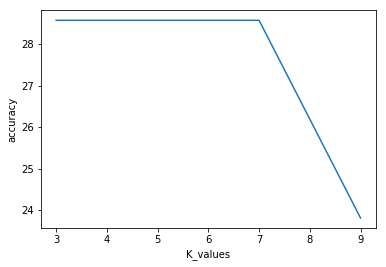

In [23]:
import matplotlib.pyplot as plt
acc=[] 
for i in range(3,10,2):
    result1=[]
    knn_match(train_data,test_data,i,train_label)
    acc.append(accuracy(test_label))
plt.plot(range(3,10,2),acc)
plt.ylabel('accuracy')
plt.xlabel('K_values')
plt.show()